C:\Users\luvra\AppData\Local\Temp\ipykernel_5052\4255196634.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


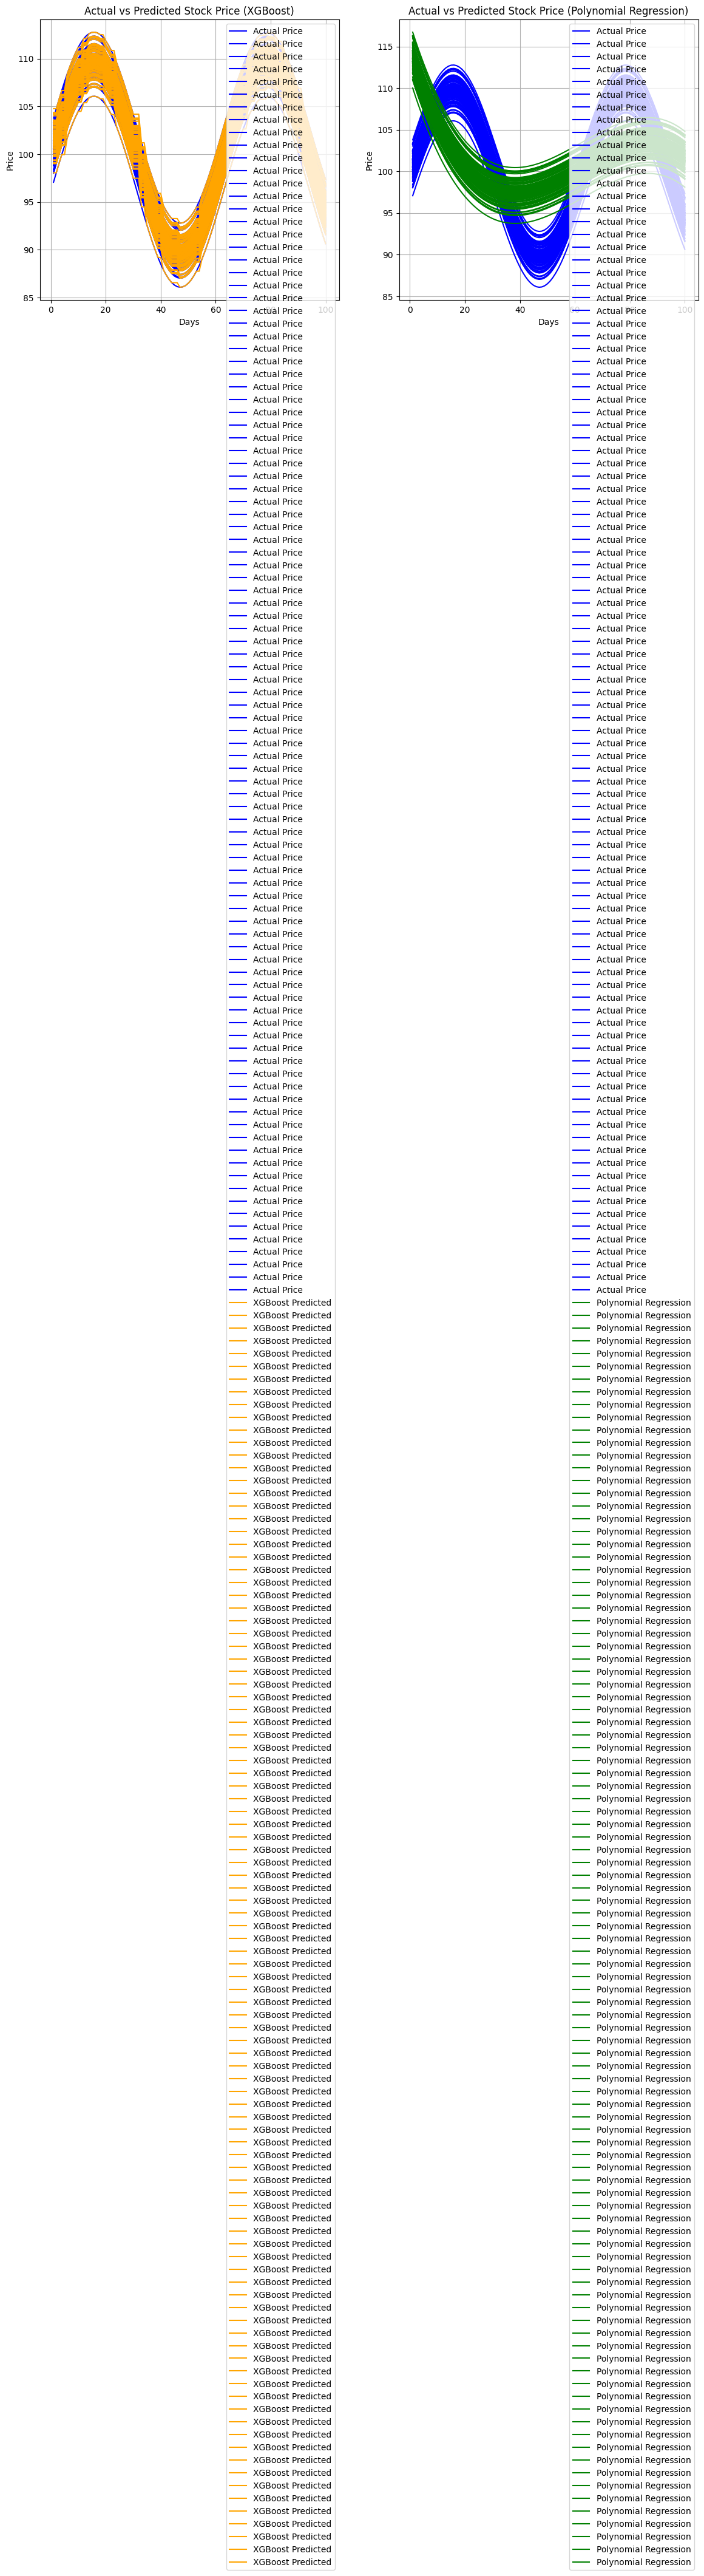

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data (or replace with actual stock data)
np.random.seed(42)
days = np.arange(1, 101).reshape(-1, 1)  # 100 days
prices = 100 + np.sin(days / 10) * 10 + np.random.normal(0, 1.5, size=(100,))  # actual prices

# Split the data
X_train, X_test, y_train, y_test = train_test_split(days, prices, test_size=0.2, random_state=42)

# --- XGBoost Model ---
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(days)

# --- Polynomial Regression Model ---
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(days)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, prices)
poly_pred = lin_reg.predict(X_poly)

# --- Plotting ---
plt.figure(figsize=(14, 6))

# XGBoost Chart
plt.subplot(1, 2, 1)
plt.plot(days, prices, label="Actual Price", color='blue')
plt.plot(days, xgb_pred, label="XGBoost Predicted", color='orange')
plt.title("Actual vs Predicted Stock Price (XGBoost)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Polynomial Regression Chart
plt.subplot(1, 2, 2)
plt.plot(days, prices, label="Actual Price", color='blue')
plt.plot(days, poly_pred, label="Polynomial Regression", color='green')
plt.title("Actual vs Predicted Stock Price (Polynomial Regression)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
